In [2]:
from pyspark import SparkContext, SparkConf

TypeError: namedtuple() missing 3 required keyword-only arguments: 'verbose', 'rename', and 'module'

In [12]:
import os
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
%matplotlib inline 
from langdetect import detect, detect_langs
import unicodedata
import re


def has_letters(s):
    return any([unicodedata.category(c) in ['Ll','Lu','Lo'] for c in s])

In [2]:
with open("/dlabdata1/odor/twitter-swisscom/sample.tsv", 'r') as f:
    read_data = f.read()

In [3]:
read_data1=read_data.replace("\\\\\n"," \n").replace("\\\n"," ").replace("\\\t"," ").split("\n")

In [5]:
read_data2=list(map(lambda x: x.split("\t"),read_data1))
read_data2=read_data2[0:-1]

In [6]:
tdata=pd.DataFrame(read_data2)

In [7]:
schema=pd.read_csv("twitter-swisscom/schema.txt",sep="\s+",quoting=csv.QUOTE_NONE,header=None)
schema.drop([0,3,4,5],axis=1,inplace=True)
tdata.columns=schema[1]

In [8]:
lang_codes=pd.read_csv("twitter-swisscom/language-codes_csv.csv")
lang_codes.set_index("alpha2",inplace=True)

In [9]:
tdata["text"]=tdata["text"].astype(str)

In [10]:
tdata["text_stripped"]=tdata.text.map(lambda x: re.sub(r'http\S+', '', x))
tdata["text_stripped"]=tdata["text_stripped"].map(lambda x: re.sub(r'#\S+', '', x))
tdata["text_stripped"]=tdata.text_stripped.map(lambda x: re.sub(r'@\S+', '', x))

In [ ]:
#a=[None] * tdata.shape[0]
#b=[None] * tdata.shape[0]
#for row in tdata["text_stripped"].iteritems():
#    try:
#        a[row[0]]=detect(row[1])
#        b[row[0]]=lang_codes.English[a[row[0]]]
#    except:
#        b[row[0]]="Undetected"

In [11]:
def translate(x):
    try:
        t=detect(x)
    except:
        t=np.nan
    return t

tdata["lang"]=tdata.text_stripped.map(lambda x: translate(x))
tdata["language"]=tdata.lang.map(lambda x: lang_codes.English[x] if not pd.isnull(x) else "Undetected")

In [ ]:
pd.to_pickle(tdata,"/dlabdata1/odor/twitter-swisscom/tdata_lang.p")

In [12]:
counts=tdata.groupby("language").id.count().sort_values(ascending=False)
counts=counts.reset_index()
counts.columns=["language","count"]
pd.to_pickle(counts,"/dlabdata1/odor/twitter-swisscom/lang_counts.p")

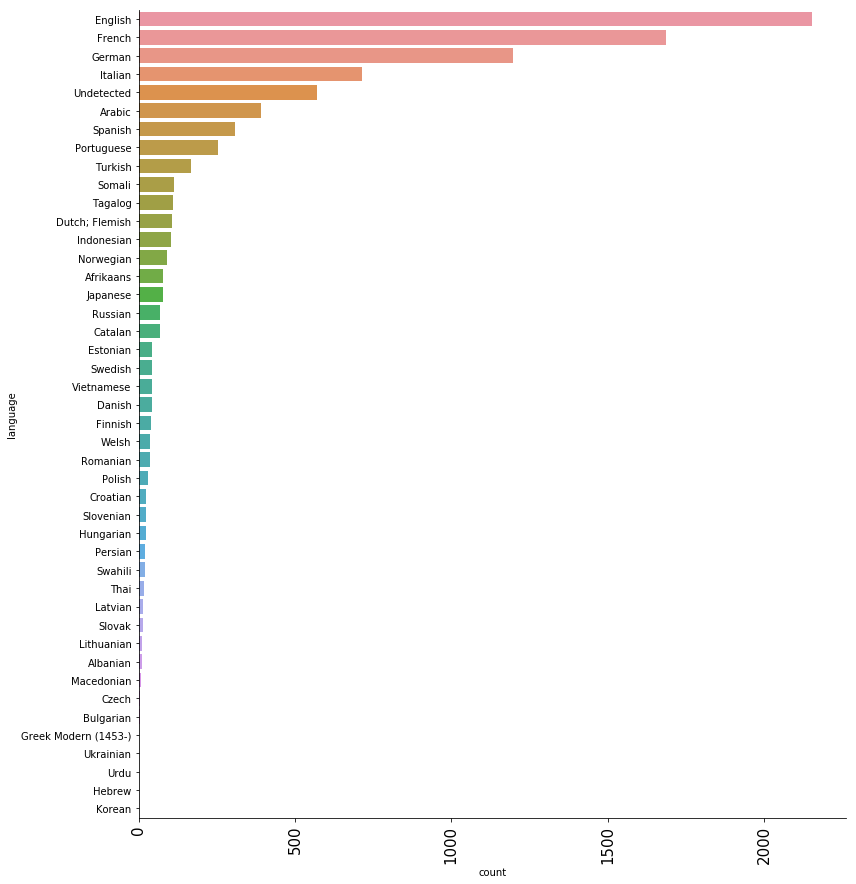

In [13]:
ax = sns.factorplot(size=12,kind = 'bar', y="language", x="count", data=counts, orient='h')
plt.xticks(rotation=90,fontsize=15)
plt.show(ax)

In [17]:
22222184.0/8790.0

2528.1210466439134

In [ ]:
#pd.set_option("display.max_rows",500)
#tdata.loc[tdata.language==""].text_stripped[0:500]

In [2]:
ls

Greg.ipynb                           preprocessing_spark.py
README.md*                           report/
harvest3r_twitter_data_31-10_1.json  twitter-swisscom/
lang_stats.py


In [1]:
import pandas as pd

In [24]:
df=pd.read_json("harvest3r_twitter_data_31-10_1.json")

In [23]:
df

,_id,_index,_score,_source,_type
0,1477932101830300416,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
1,1477932003347200000,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
2,1477932015935600128,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
3,1477932023357600256,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
4,1477930399460100352,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
5,1477930396347200256,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_location': ...",content
6,1477931701925700096,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
7,1477931717648100096,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_location': ...",content
8,1477930226354500096,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content
9,1477930226928800000,merged_content_2016_10_27_to_2016_11_02,0.000239,"{'source_image_height': 0, 'source_favicon_wid...",content


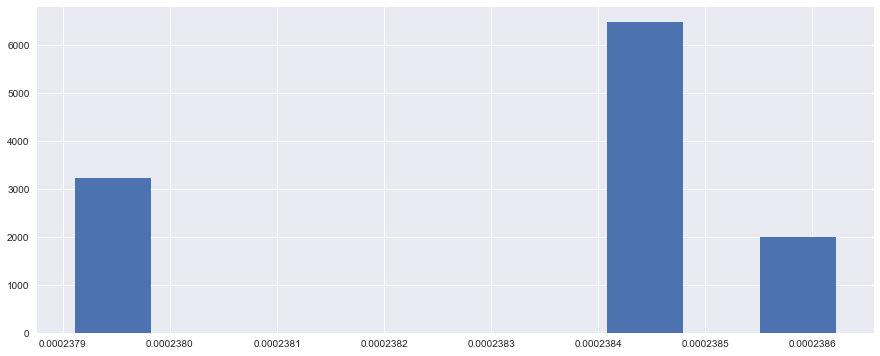

In [15]:
df._score.hist(figsize=(15,6))

In [32]:
df._source.values

array([ {'source_image_height': 0, 'source_favicon_width': 0, 'site': 'twitter.com', 'metadata_score': 315, 'source_image_width': 0, 'geo_name_id': '2658205', 'geo_method': 'SOURCE_LOCATION', 'source_hashcode': 'wT6MAuMdhQO5njUQtmAc_fN8UrI', 'permalink': 'https://www.twitter.com/pierreyvesrevaz/status/793130474172456964', 'metadata_updates': 11, 'source_setting_minimum_content_metadata_score': 0, 'source_link': 'https://twitter.com/pierreyvesrevaz', 'author_handle': 'pierreyvesrevaz', 'main_format': 'TEXT', 'source_likes': 0, 'source_created': '2009-03-20T01:16:00Z', 'main': 'Une étudiante américaine affichée en ligne par la police http://www.netvibes.com/share/5Re6\xa0', 'dislikes': 0, 'comments': 0, 'author_gender': 'UNKNOWN', 'source_last_published': '2016-10-31T16:09:50Z', 'source_last_updated': '2016-10-31T16:09:50Z', 'source_title': 'Pierre-Yves Revaz', 'source_publisher_type': 'MICROBLOG', 'source_date_found': '2016-10-28T22:55:28Z', 'source_http_status': 200, 'source_update_int

In [36]:
pd.set_option("display.max_columns",500)
df2=pd.DataFrame.from_dict(list(df._source.values))

In [53]:
df2.date_found

0        2016-10-31T16:41:41Z
1        2016-10-31T16:40:03Z
2        2016-10-31T16:40:15Z
3        2016-10-31T16:40:23Z
4        2016-10-31T16:13:19Z
5        2016-10-31T16:13:16Z
6        2016-10-31T16:35:01Z
7        2016-10-31T16:35:17Z
8        2016-10-31T16:10:26Z
9        2016-10-31T16:10:26Z
10       2016-10-31T15:56:17Z
11       2016-10-31T16:04:19Z
12       2016-10-31T16:04:05Z
13       2016-10-31T12:08:43Z
14       2016-10-31T12:10:48Z
15       2016-10-31T12:11:46Z
16       2016-10-31T12:11:52Z
17       2016-10-31T12:13:58Z
18       2016-10-31T12:14:02Z
19       2016-10-31T12:14:02Z
20       2016-10-31T12:14:06Z
21       2016-10-31T12:24:49Z
22       2016-10-31T12:24:52Z
23       2016-10-31T12:24:55Z
24       2016-10-31T12:25:05Z
25       2016-10-31T12:08:27Z
26       2016-10-31T12:11:47Z
27       2016-10-31T12:11:55Z
28       2016-10-31T12:12:28Z
29       2016-10-31T12:12:31Z
                 ...         
11693    2016-10-31T05:38:08Z
11694    2016-10-31T05:38:05Z
11695    2

In [50]:
counts=df2[["lang","author_user_id"]].groupby("lang").author_user_id.count().sort_values(ascending=False)
counts=counts.reset_index()
#counts.columns=["language","count"]
#pd.to_pickle(counts,"/dlabdata1/odor/twitter-swisscom/lang_counts.p")

In [52]:
df2.loc[df2.lang=="hu"]

,author_avatar_img,author_gender,author_handle,author_link,author_name,author_user_id,bucket,canonical,comments,date_found,dislikes,domain,geo_city,geo_country,geo_featurename,geo_location,geo_location_id,geo_method,geo_name,geo_name_id,geo_point,geo_state,hashcode,image_src,index_method,lang,last_updated,likes,links,main,main_authoritative,main_checksum,main_format,main_length,mentions,metadata_score,metadata_updates,permalink,published,replied,replied_profile_link,replied_profile_title,resource,sentiment,sequence,sequence_range,shared,shared_profile_link,shared_profile_title,shares,site,source_assigned_tags,source_content_checksum,source_content_length,source_created,source_date_found,source_description,source_favicon_height,source_favicon_width,source_favorites,source_followers,source_following,source_handle,source_hashcode,source_http_status,source_image_height,source_image_src,source_image_width,source_last_posted,source_last_published,source_last_updated,source_likes,source_link,source_location,source_next_update,source_parsed_posts,source_parsed_posts_max,source_profiles,source_publisher_subtype,source_publisher_type,source_resource,source_setting_author_policy,source_setting_index_strategy,source_setting_minimum_content_metadata_score,source_setting_update_strategy,source_spam_probability,source_title,source_update_interval,source_user_interactions,source_verified,tags,type,version,video_player
346,https://pbs.twimg.com/profile_images/604983221...,MALE,Frechgeist,https://twitter.com/Frechgeist,Markus Felber,46348909,1478106000016,https://twitter.com/Frechgeist/status/79320835...,NaN,2016-11-02T17:01:55Z,NaN,twitter.com,Mauensee,CH,PPL,"Mauensee, Schweiz",81d55f6549849731,DEFAULT,"Mauensee, Sursee District, Lucerne, Switzerland",2659721,"47.16847,8.06617",Lucerne,_A7UYhNMRHFmvMEdwmRI6XxFV8w,NaN,SOURCE_TASK,hu,2016-11-02T17:01:55Z,0,NaN,@SteiRugeli Jösses!,True,GFgLC_SxN5Bd2d_C6HMF57bjgTQ,TEXT,19,[SteiRugeli],314,NaN,https://twitter.com/Frechgeist/status/79320835...,2016-10-31T21:49:44Z,True,/SteiRugeli,341693727,https://twitter.com/Frechgeist/status/79320835...,NEUTRAL,1478106115269800133,7116,NaN,NaN,NaN,0,twitter.com,[#G0YTWiryNleW5W4IWx2LALoQzdE],rmh9Bu5yBHzbwQs3Ly9dwNLYlK4,326330.0,2009-06-11T01:56:00Z,2016-11-01T19:45:13Z,"<p>Wer mir folgt, sollte mich nicht allzu erns...",0.0,0.0,24500.0,6977,1485.0,Frechgeist,y84p1CTHF0WY3Sg48JlLehts19c,200.0,0.0,https://pbs.twimg.com/profile_images/604983221...,0.0,2016-10-31T06:15:32Z,2016-11-02T17:01:53Z,2016-11-02T14:58:28Z,0.0,https://twitter.com/frechgeist,"Frecher Geist weht, wo er will",2016-11-02T17:01:33Z,20.0,20.0,[http://www.fel.ch],twitter,MICROBLOG,https://twitter.com/frechgeist,NaN,DEFAULT,0.0,ADAPTIVE,0.0,Markus Felber,7382346,0.0,True,NaN,POST,6.5.3,NaN
